In [134]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.collections import PolyCollection
from matplotlib.animation import FuncAnimation

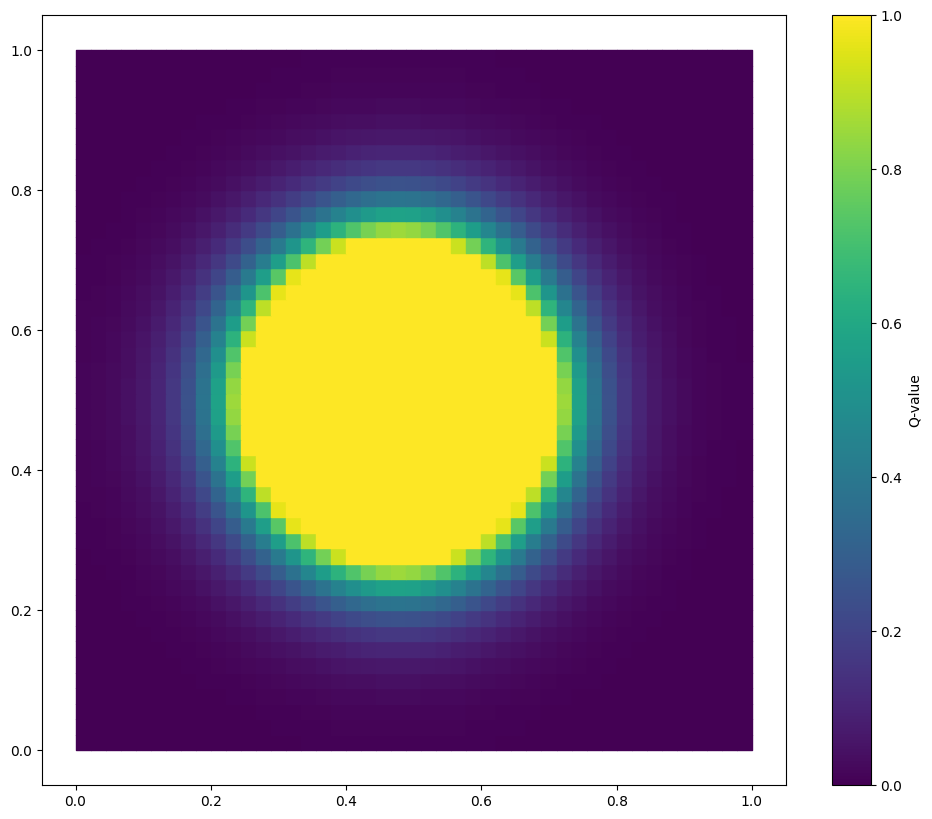

In [149]:
def process_file(file_name):
    df = pd.read_csv(file_name, delimiter=';', header=None)
    Q = df.iloc[:, -1].astype(float)
    coords = df.iloc[:, :-1]

    polygons = []
    for index, row in coords.iterrows():
        poly = []
        for item in row.dropna():
            points = item.split(",")
            points = np.array(points, dtype=float).reshape(2,2)
            poly.append(points[0])
        poly.append(poly[0])  # Close the polygon
        polygons.append(np.array(poly))
    
    return polygons, Q

polygons, Q = process_file('files/mesh1960.csv')

# plot mesh with Q
fig, ax = plt.subplots(figsize = (12, 10))
norm = mcolors.Normalize(vmin=0, vmax=1)
collection = PolyCollection(polygons, array=Q, cmap='viridis', norm=norm, edgecolor='face') # edgecolor = 'none' / 'face'
ax.add_collection(collection)
ax.autoscale_view()
cbar = fig.colorbar(collection, ax=ax)
cbar.set_label('Q-value')
plt.savefig('figures/image.png')
plt.show()


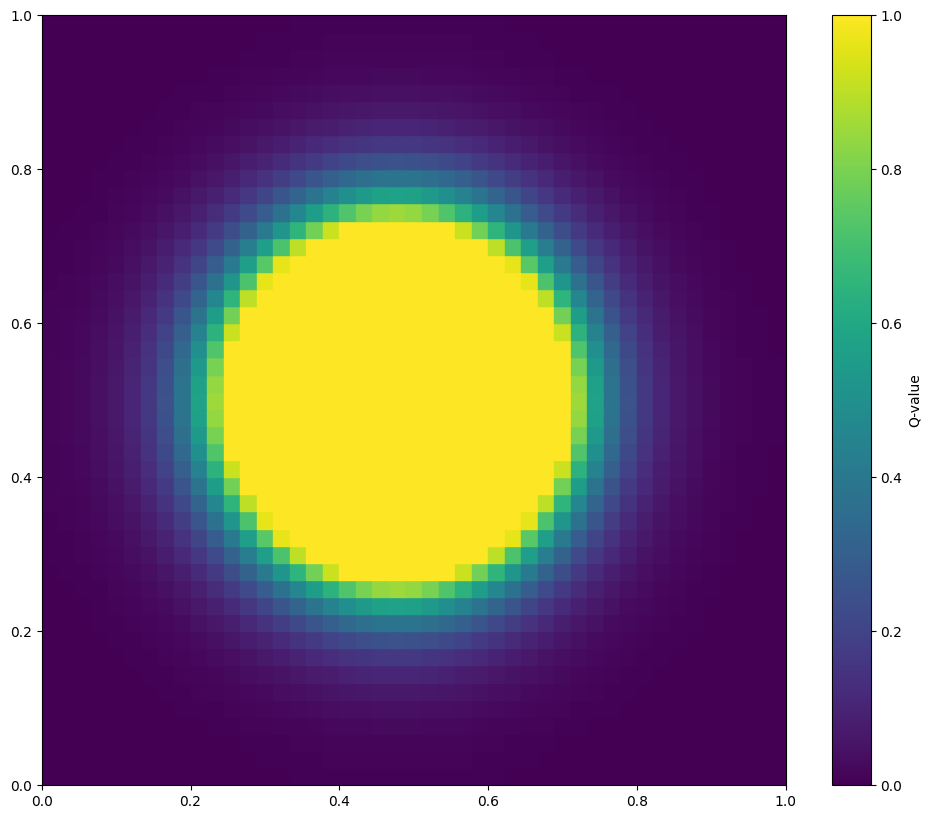

In [150]:
# define figure and axes
fig, ax = plt.subplots(figsize=(12, 10))
norm = mcolors.Normalize(vmin=0, vmax=1)
collection = PolyCollection([], array=[], cmap='viridis', norm=norm)
collection.set_edgecolor('face') # edgecolor = 'none' / 'face'
ax.add_collection(collection)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
cbar = fig.colorbar(collection, ax=ax)
cbar.set_label('Q-value')

# animation update function
def update(frame):
    file_name = f"files/mesh{frame}.csv"
    polygons, Q = process_file(file_name)
    collection.set_paths(polygons)
    collection.set_array(Q)
    return collection,

# animation
frames = range(0, 2000, 40)
fps = 30
ani = FuncAnimation(fig, update, frames=frames, blit=True, repeat=False)
ani.save('figures/animation.gif', fps=fps)
plt.show()
